In [1]:
import pandas as pd
import glob
import os
import datetime
import pprint
pp = pprint.PrettyPrinter(indent=4)


In [2]:
sensorFolder = 'spl-deploy-rc3flr'

## Data Pre-Processing

In [91]:
#checking files in folder -- this notebook is in the same directory
"""
optional

"""
files = os.listdir('./'+sensorFolder)
# pp.pprint(files)

In [93]:
#selecting all the csv files
files = os.path.join(sensorFolder,"2022*.csv")

# list of merged files returned
files = glob.glob(files)

#sorting files by date
files.sort()
# pp.pprint(files)

#checking a single file
print(files[0])

spl-deploy-rc3flr/2022-05-18.csv


In [94]:
#getting total length of rows merged csv SHOULD be
"""
optional

"""
c = 0
for f in files:
#     print(f)
    results = pd.read_csv(f)
    c+= len(results)
print(c)

1930963


In [6]:
print("Resultant CSV after joining all CSV files at a particular location...");
# joining files with concat and read_csv
df = pd.concat(map(pd.read_csv, files), ignore_index=True)
print(df)

Resultant CSV after joining all CSV files at a particular location...
         Unnamed: 0   laeq   lceq   lzeq          time
0                 0  64.35  72.85  73.29  1.652933e+09
1                 1  64.44  73.43  73.85  1.652933e+09
2                 2  64.08  72.59  73.08  1.652933e+09
3                 3  64.06  71.71  72.36  1.652933e+09
4                 4  63.41  71.62  72.22  1.652933e+09
...             ...    ...    ...    ...           ...
1930958         115  61.96  72.26  73.65  1.655093e+09
1930959         116  61.29  73.09  74.81  1.655093e+09
1930960         117  58.99  73.20  74.77  1.655093e+09
1930961         118  58.27  74.80  76.56  1.655093e+09
1930962         119  58.17  73.69  75.72  1.655093e+09

[1930963 rows x 5 columns]


In [7]:
#converting epoch time to datetime
df['time'] = df.time.apply(datetime.datetime.fromtimestamp)
df.rename(columns={'time': 'datetime'}, inplace=True)


In [190]:
#adding additional columns for datetime 

#extracting exact date
df['date'] = df['datetime'].dt.date

#extracting day of week
df['dayofweek'] = df['datetime'].dt.dayofweek
# df['dayofweek_name'] = df['datetime'].dt.day_name

#extracting extra data
df['time'] = df['datetime'].dt.time
# df['min'] = df['datetime'].dt.minute
# df['sec'] = df['datetime'].dt.second

In [191]:
#checking file
print(df.head(10))

   Unnamed: 0   laeq   lceq   lzeq                datetime        date  \
0           0  64.35  72.85  73.29 2022-05-18 23:59:16.155  2022-05-18   
1           1  64.44  73.43  73.85 2022-05-18 23:59:16.898  2022-05-18   
2           2  64.08  72.59  73.08 2022-05-18 23:59:18.392  2022-05-18   
3           3  64.06  71.71  72.36 2022-05-18 23:59:19.126  2022-05-18   
4           4  63.41  71.62  72.22 2022-05-18 23:59:19.871  2022-05-18   
5           5  63.54  72.25  72.89 2022-05-18 23:59:21.354  2022-05-18   
6           6  64.80  72.67  73.34 2022-05-18 23:59:22.099  2022-05-18   
7           7  63.47  71.40  71.84 2022-05-18 23:59:23.584  2022-05-18   
8           8  63.72  71.85  72.46 2022-05-18 23:59:24.327  2022-05-18   
9           9  64.44  72.09  72.74 2022-05-18 23:59:25.071  2022-05-18   

   dayofweek  hour             time  
0          2    23  23:59:16.155000  
1          2    23  23:59:16.898000  
2          2    23  23:59:18.392000  
3          2    23  23:59:19.1260

In [ ]:
#saving df to csv
# df.to_csv('masterdata.csv') #uncomment to save file locally

## Analyzing Data

In [315]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from matplotlib.pyplot import figure
import numpy as np
from matplotlib.pyplot import cm


# plt.rcParams.update({'font.family':'monospace'})
import matplotlib
%pip install matplotlib==3.4


# Just write the name of the font
matplotlib.rcParams['font.sans-serif'] = 'Lato'
# print(matplotlib.rcParams['font.sans-serif'])

Note: you may need to restart the kernel to use updated packages.


In [11]:
def getBasicStat(groupbyThisName):
    result = df.groupby(groupbyThisName).agg({'laeq': ['mean', 'min', 'max', 'std', 'median']})
    ambientEQ = df.groupby(groupbyThisName).quantile(0.1)
    fiftyEQ = df.groupby(groupbyThisName).quantile(0.5)
    minEQ = df.groupby(groupbyThisName).quantile(0.01)
    maxEQ = df.groupby(groupbyThisName).quantile(0.90)
    
    result['ambientEQ'] = ambientEQ['laeq']
    result['fiftyEQ'] = fiftyEQ['laeq']
    result['minsEQ'] = minEQ['laeq']
    result['maxsEQ'] = maxEQ['laeq']

    ambientEQ= ambientEQ['laeq']
    fiftyEQ= fiftyEQ['laeq']
    minsEQ = minEQ['laeq']
    maxsEQ = maxEQ['laeq']

    days = result.index
    means = result['laeq', 'mean']
    
    mins = result['laeq', 'min']
    maxs = result['laeq', 'max']
    stds = result['laeq', 'std']
    medians = result['laeq', 'median']
    
    
#     return result
    return days, means, mins, maxs, stds, medians, ambientEQ, minsEQ, maxsEQ, fiftyEQ, result;

#### Pulling Fast Facts

In [184]:
FFdf = df.copy()

In [185]:
FFdf.head(4)

,Unnamed: 0,laeq,lceq,lzeq,datetime,date,dayofweek,hour
0,0,64.35,72.85,73.29,2022-05-18 23:59:16.155,2022-05-18,2,23
1,1,64.44,73.43,73.85,2022-05-18 23:59:16.898,2022-05-18,2,23
2,2,64.08,72.59,73.08,2022-05-18 23:59:18.392,2022-05-18,2,23
3,3,64.06,71.71,72.36,2022-05-18 23:59:19.126,2022-05-18,2,23


In [203]:
def L50(x): 
    return np.percentile(x, q=50)
def L10(x): 
    return np.percentile(x, q=10)
def L90(x): 
    return np.percentile(x, q=90)

In [204]:
DTaggs = FFdf.groupby(['date']).agg({'laeq':[L50,L10,L90]})
DTaggs.columns = ['L50', 'L10', 'L90']
DTaggs = DTaggs.reset_index()

In [255]:
mean_min = DTaggs.L50.min()

mean_minDay = DTaggs.loc[DTaggs['L50'].idxmin(), 'date']
print("Minimum Average SPL", mean_min, "dB(A) and its corresponding date:", mean_minDay)

mean_max = DTaggs.L50.max()
mean_maxDay = DTaggs.loc[DTaggs['L50'].idxmax(), 'date']

print("Maximum Average SPL", mean_max, "dB(A) and its corresponding date:", mean_maxDay)

Minimum Average SPL 61.98 dB(A) and its corresponding date: 2022-05-29
Maximum Average SPL 66.39 dB(A) and its corresponding date: 2022-05-20


In [193]:
dnDF = df.copy()

In [194]:
dnDF

,Unnamed: 0,laeq,lceq,lzeq,datetime,date,dayofweek,hour,time
0,0,64.35,72.85,73.29,2022-05-18 23:59:16.155,2022-05-18,2,23,23:59:16.155000
1,1,64.44,73.43,73.85,2022-05-18 23:59:16.898,2022-05-18,2,23,23:59:16.898000
2,2,64.08,72.59,73.08,2022-05-18 23:59:18.392,2022-05-18,2,23,23:59:18.392000
3,3,64.06,71.71,72.36,2022-05-18 23:59:19.126,2022-05-18,2,23,23:59:19.126000
4,4,63.41,71.62,72.22,2022-05-18 23:59:19.871,2022-05-18,2,23,23:59:19.871000
...,...,...,...,...,...,...,...,...,...
1930958,115,61.96,72.26,73.65,2022-06-13 00:01:54.668,2022-06-13,0,0,00:01:54.668000
1930959,116,61.29,73.09,74.81,2022-06-13 00:01:56.150,2022-06-13,0,0,00:01:56.150000
1930960,117,58.99,73.20,74.77,2022-06-13 00:01:56.893,2022-06-13,0,0,00:01:56.893000
1930961,118,58.27,74.80,76.56,2022-06-13 00:01:57.638,2022-06-13,0,0,00:01:57.638000


In [196]:
dnDF['isDay']= np.where((dnDF.time > datetime.time(6,0)) & (dnDF.time < datetime.time(18,0)), True, False)
DAYdnDF = dnDF[dnDF['isDay'] == True]
NIGHTdnDF = dnDF[dnDF['isDay'] == False]

In [197]:
DAYdnDF.head()

,Unnamed: 0,laeq,lceq,lzeq,datetime,date,dayofweek,hour,time,isDay
21600,0,68.45,76.05,76.82,2022-05-18 17:59:16.364,2022-05-18,2,17,17:59:16.364000,True
21601,1,67.96,75.80,76.59,2022-05-18 17:59:17.849,2022-05-18,2,17,17:59:17.849000,True
21602,2,66.62,75.91,76.64,2022-05-18 17:59:18.594,2022-05-18,2,17,17:59:18.594000,True
21603,3,65.89,76.22,77.21,2022-05-18 17:59:19.335,2022-05-18,2,17,17:59:19.335000,True
21604,4,66.29,76.09,76.87,2022-05-18 17:59:20.820,2022-05-18,2,17,17:59:20.820000,True


In [208]:
DAYaggs = DAYdnDF.groupby(['date']).agg({'laeq':[L50,L10,L90]})
DAYaggs.columns = ['L50', 'L10', 'L90']
DAYaggs = DAYaggs.reset_index()

DAYambient_avg = DAYaggs.L10.mean()
print("Average Daily Ambient SPL", DAYambient_avg, "dB(A)")

NIGHTaggs = NIGHTdnDF.groupby(['date']).agg({'laeq':[L50,L10,L90]})
NIGHTaggs.columns = ['L50', 'L10', 'L90']
NIGHTaggs = NIGHTaggs.reset_index()

NIGHTambient_avg = NIGHTaggs.L10.mean()
print("Average Nightly Ambient SPL", NIGHTambient_avg, "dB(A)")


Average Daily Ambient SPL 62.39037037037037 dB(A)
Average Nightly Ambient SPL 58.54807407407408 dB(A)


In [142]:
mean_ambient = DTaggs.L10.mean()

print("Overall Ambient SPL", mean_ambient, "dB(A)")

Overal Ambient SPL 59.28222222222224 dB(A)


In [258]:
HRdf = df.copy()
group = pd.Grouper(key='datetime', freq='1H')
byHour = HRdf.groupby(group).agg({'laeq':['median']})
L10_1H= df.groupby(group).quantile(0.1)
L50_1H = df.groupby(group).quantile(0.5)
L90_1H = df.groupby(group).quantile(0.90)

byHour['L10'] = L10_1H['laeq']
byHour['L50'] = L50_1H['laeq']
byHour['L90'] = L90_1H['laeq']
byHour['date'] = byHour.index.date
byHour['hour'] = byHour.index.hour

# byHour.head(20)
byHour.columns = byHour.columns.droplevel(-1)

# print(byHour.L10.mean())

#find sum of L50 of a given day
HRxL50mean = byHour.groupby(byHour.index.date)['L50'].mean()
# print(HRxL50sum)

byHour['L50mean'] = byHour['date'].map(HRxL50mean)

byHour.head(10)


,laeq,L10,L50,L90,date,hour,L50mean
datetime,,,,,,,
2022-05-18 15:00:00,65.735,65.06,65.735,67.177,2022-05-18,15,65.560556
2022-05-18 16:00:00,65.990,65.40,65.990,67.221,2022-05-18,16,65.560556
2022-05-18 17:00:00,65.920,65.37,65.920,67.300,2022-05-18,17,65.560556
2022-05-18 18:00:00,65.970,65.27,65.970,67.491,2022-05-18,18,65.560556
2022-05-18 19:00:00,65.790,65.22,65.790,66.820,2022-05-18,19,65.560556
2022-05-18 20:00:00,65.800,65.23,65.800,67.161,2022-05-18,20,65.560556
2022-05-18 21:00:00,65.170,64.44,65.170,66.210,2022-05-18,21,65.560556
2022-05-18 22:00:00,64.980,64.24,64.980,66.500,2022-05-18,22,65.560556
2022-05-18 23:00:00,64.690,64.02,64.690,65.700,2022-05-18,23,65.560556


In [260]:
print(byHour.L50.max())

loudestDay = byHour.loc[byHour['L50'].idxmax()]
print(loudestDay)
# # print(byHour.L50mean.min())
# # quietestDay = byHour.loc[byHour['L50mean'].idxmin(), 'date']
# # print(quietestDay)

68.39
laeq            68.39
L10             66.15
L50             68.39
L90             69.74
date       2022-05-19
hour                6
L50mean     65.986458
Name: 2022-05-19 06:00:00, dtype: object


#### Time-Series: All Data 

In [97]:
"""
Aggregating data by Freq=30min
"""
DTdays, DTmeans, DTmins, DTmaxs, DTstds, DTmedians, DTambient, DTminsEQ, DTmaxsEQ, DTfiftyEQ, TSxDT = getBasicStat(pd.Grouper(key='datetime', freq='30min'))

In [101]:
print(TSxDT.head(5))

                          laeq                                 ambientEQ  \
                          mean    min    max       std  median             
datetime                                                                   
2022-05-18 15:30:00  66.081280  60.14  87.18  1.832391  65.735     65.06   
2022-05-18 16:00:00  66.085828  64.67  76.03  0.885272  65.920     65.37   
2022-05-18 16:30:00  66.445950  64.71  79.45  1.414080  66.080     65.44   
2022-05-18 17:00:00  65.962994  64.60  77.46  0.941412  65.800     65.26   
2022-05-18 17:30:00  66.636889  64.79  85.48  1.971556  66.080     65.50   

                    fiftyEQ   minsEQ  maxsEQ  
                                              
datetime                                      
2022-05-18 15:30:00  65.735  64.4363  67.177  
2022-05-18 16:00:00  65.920  64.9899  66.890  
2022-05-18 16:30:00  66.080  65.0799  67.620  
2022-05-18 17:00:00  65.800  64.9200  66.670  
2022-05-18 17:30:00  66.080  65.0100  68.140  


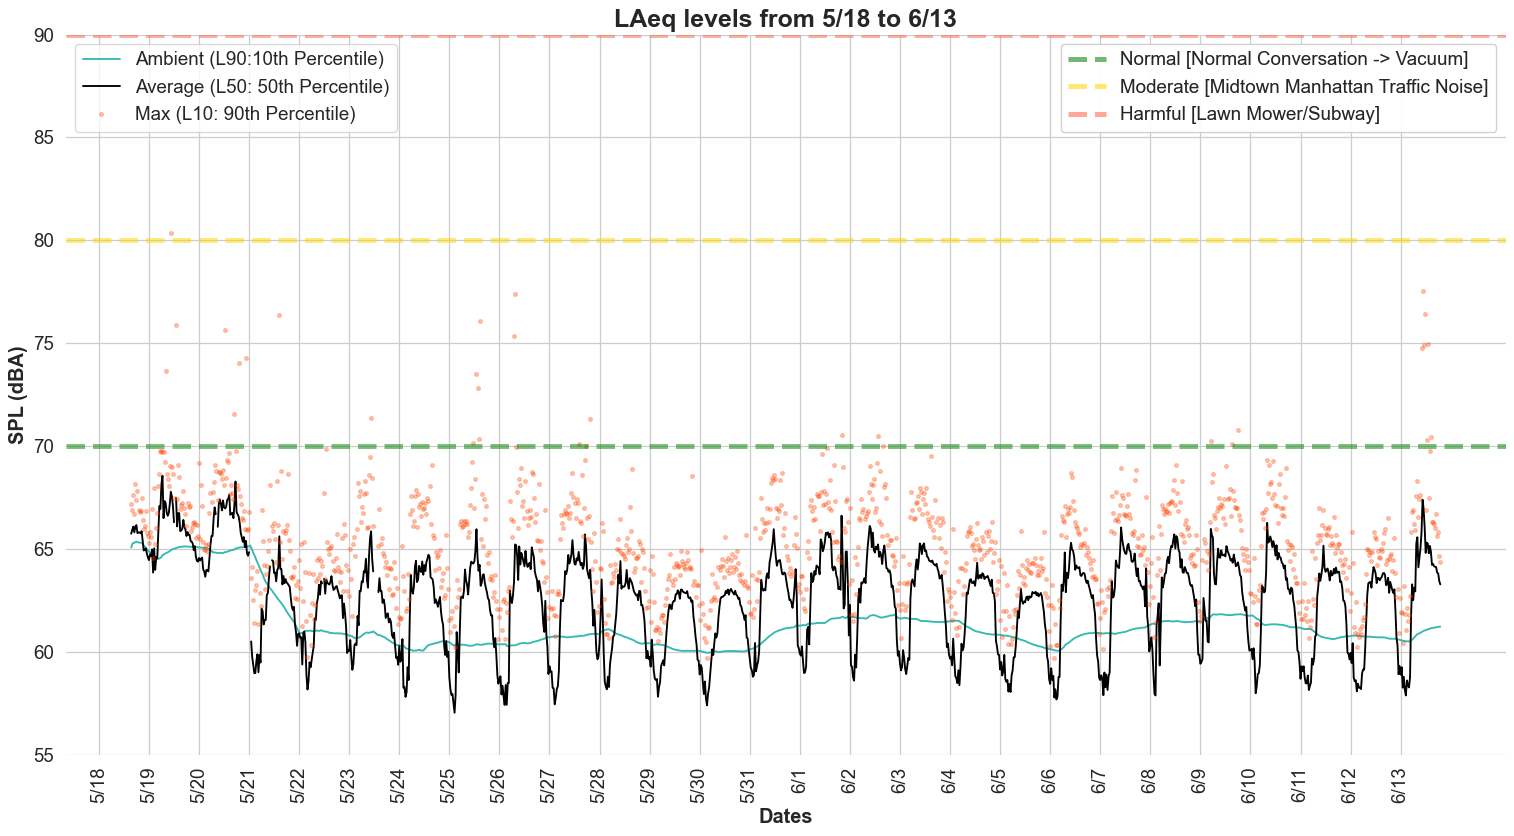

In [98]:
"""
Plotting time-series of entire deployment duration
"""
fig = figure(figsize=(16, 8), dpi=90)
ax = fig.add_axes([1, 1, 1, 1])
lw = 4

xlabels = ['/'.join([str(y.month), str(y.day)]) for y in np.unique(DTdays.date)]

rollingAmbient = DTambient.rolling('24H').mean()
AmbientL90, = plt.plot(DTdays, rollingAmbient,'-', c='lightseagreen',label = 'Ambient (L90:10th Percentile)', alpha=0.9)
MeanL50, = plt.plot(DTdays, DTfiftyEQ, '-', c='black',label='Average (L50: 50th Percentile)')
MaxL10,= plt.plot(DTdays, DTmaxsEQ,'.',c='orangered',label = 'Max (L10: 90th Percentile)', alpha=0.3)

ref6070 = plt.axhline(70,color='green',linestyle='--',alpha=0.5,linewidth=lw,label='Normal [Normal Conversation -> Vacuum]')
ref7080 = plt.axhline(80,color='gold',linestyle='--',alpha=0.5, linewidth=lw,label='Moderate [Midtown Manhattan Traffic Noise]')
ref8090 = plt.axhline(90,color='tomato',linestyle='--',alpha=0.5,linewidth=lw, label='Harmful [Lawn Mower/Subway]')

# plt.xticks(DTdays_labelDay)  # Set text labels.
plt.xticks(ticks=np.unique(DTdays.date),labels=xlabels, fontsize=15, rotation=90) # Set text labels.
plt.yticks(fontsize=15, rotation=0) # Set text labels.

plt.xlabel('Dates', fontsize=16, fontweight='bold')
plt.ylabel('SPL (dBA)', fontsize=16,fontweight='bold')
plt.ylim([55,90])
plt.title(f'LAeq levels from {xlabels[0]} to {xlabels[-1]}', fontsize=20, fontweight='bold')
plt.grid(True)

first_legend = plt.legend(handles=[AmbientL90, MeanL50, MaxL10],facecolor = 'white',loc='upper left', fontsize=15)
plt.gca().add_artist(first_legend)
refLegend= plt.legend(handles=[ref6070, ref7080, ref8090],facecolor = 'white',loc='upper right', fontsize=15)
plt.gca().add_artist(refLegend)

# labelLines(plt.gca().get_lines(), zorder=2.5)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()

#### Time Series: Day of Week

##### Helper Functions

In [18]:
"""
|| FUNCTION: backfill a week with empty values if a week starts mid-week
"""
def backfillWeek(df, freq):
    firstDate= np.unique(df.index.date)[0]
    firstDatetime=df.index[0]
    last_monday = firstDate - datetime.timedelta(days=firstDate.weekday())
    print(f'First Date: {firstDate} -> Monday of that Week: {last_monday}')

    #filling in data
    rng = pd.date_range(start=last_monday, end=firstDatetime, closed='left',freq=freq)
#     print(rng)
    return rng

In [22]:
"""
|| FUNCTION: Separate data into weeks (Mon-Sun)
"""
def groupWeek(data, showData = False):
    weeks = {}
    wk = pd.DataFrame(columns = data.columns)
    dates = data.index
    c = 0
#     print(type(wk), type(data))

    for d in dates:
        if (d.dayofweek == 6 and d.time() == dates.time.max()):
            c+=1
            wk.loc[d]=data.loc[d]
            weeks[c] = wk

            wk = pd.DataFrame(columns = data.columns)
        else:
            wk.loc[d]=data.loc[d]
    if showData == True:
        for key in weeks:
            print("\n" +"="*40)
            print(key)
            print("-"*40)
            print(weeks[key])
    return weeks


In [26]:
daysofweekDict = {0:'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 
                  4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

In [342]:
from datetime import datetime
hrs24 = [str(hr) for hr in np.arange(24)]
hrs12 = {hr: datetime.strptime(hr, "%H").strftime("%I %p") for hr in hrs24}
# d = datetime.strptime("13", "%H").strftime("%I %p")
print(hrs12)

{'0': '12 AM', '1': '01 AM', '2': '02 AM', '3': '03 AM', '4': '04 AM', '5': '05 AM', '6': '06 AM', '7': '07 AM', '8': '08 AM', '9': '09 AM', '10': '10 AM', '11': '11 AM', '12': '12 PM', '13': '01 PM', '14': '02 PM', '15': '03 PM', '16': '04 PM', '17': '05 PM', '18': '06 PM', '19': '07 PM', '20': '08 PM', '21': '09 PM', '22': '10 PM', '23': '11 PM'}


###### Prepping Data

In [16]:
"""
Aggregating data by Freq=30min
"""
TSxDoW_all = getBasicStat(pd.Grouper(key='datetime', freq='30min'))
TSxDoW = TSxDoW_all[-1]
print(TSxDoW.head(10))

                          laeq                                 ambientEQ  \
                          mean    min    max       std  median             
datetime                                                                   
2022-05-18 15:30:00  66.081280  60.14  87.18  1.832391  65.735     65.06   
2022-05-18 16:00:00  66.085828  64.67  76.03  0.885272  65.920     65.37   
2022-05-18 16:30:00  66.445950  64.71  79.45  1.414080  66.080     65.44   
2022-05-18 17:00:00  65.962994  64.60  77.46  0.941412  65.800     65.26   
2022-05-18 17:30:00  66.636889  64.79  85.48  1.971556  66.080     65.50   
2022-05-18 18:00:00  66.372950  64.63  83.52  1.175837  66.150     65.47   
2022-05-18 18:30:00  66.313939  64.19  82.15  1.936703  65.760     65.16   
2022-05-18 19:00:00  66.030617  64.22  86.57  1.152926  65.800     65.23   
2022-05-18 19:30:00  66.004194  64.36  78.90  1.172119  65.790     65.21   
2022-05-18 20:00:00  66.171389  64.50  84.83  2.010280  65.750     65.21   

           

In [23]:
"""
Backfilling the first week and sorting it
"""
rng = backfillWeek(TSxDoW, '30min')
weekInfo = groupWeek(TSxDoW)
weekInfo[1] = weekInfo[1].append(pd.DataFrame(index=rng))
weekInfo[1] = weekInfo[1].sort_index()

First Date: 2022-05-18 -> Monday of that Week: 2022-05-16


In [24]:
print(weekInfo)

{1:                           laeq                                 ambientEQ  \
                          mean    min    max       std  median             
2022-05-16 00:00:00        NaN    NaN    NaN       NaN     NaN       NaN   
2022-05-16 00:30:00        NaN    NaN    NaN       NaN     NaN       NaN   
2022-05-16 01:00:00        NaN    NaN    NaN       NaN     NaN       NaN   
2022-05-16 01:30:00        NaN    NaN    NaN       NaN     NaN       NaN   
2022-05-16 02:00:00        NaN    NaN    NaN       NaN     NaN       NaN   
...                        ...    ...    ...       ...     ...       ...   
2022-05-22 21:30:00  63.090202  59.66  77.86  2.473211  62.330    60.930   
2022-05-22 22:00:00  62.485377  58.73  81.16  2.764649  61.870    59.775   
2022-05-22 22:30:00  61.710389  58.08  78.64  2.403682  61.210    59.597   
2022-05-22 23:00:00  60.431300  57.37  76.72  2.555764  59.935    58.248   
2022-05-22 23:30:00  60.597643  57.21  72.37  2.309723  60.060    58.079   

       

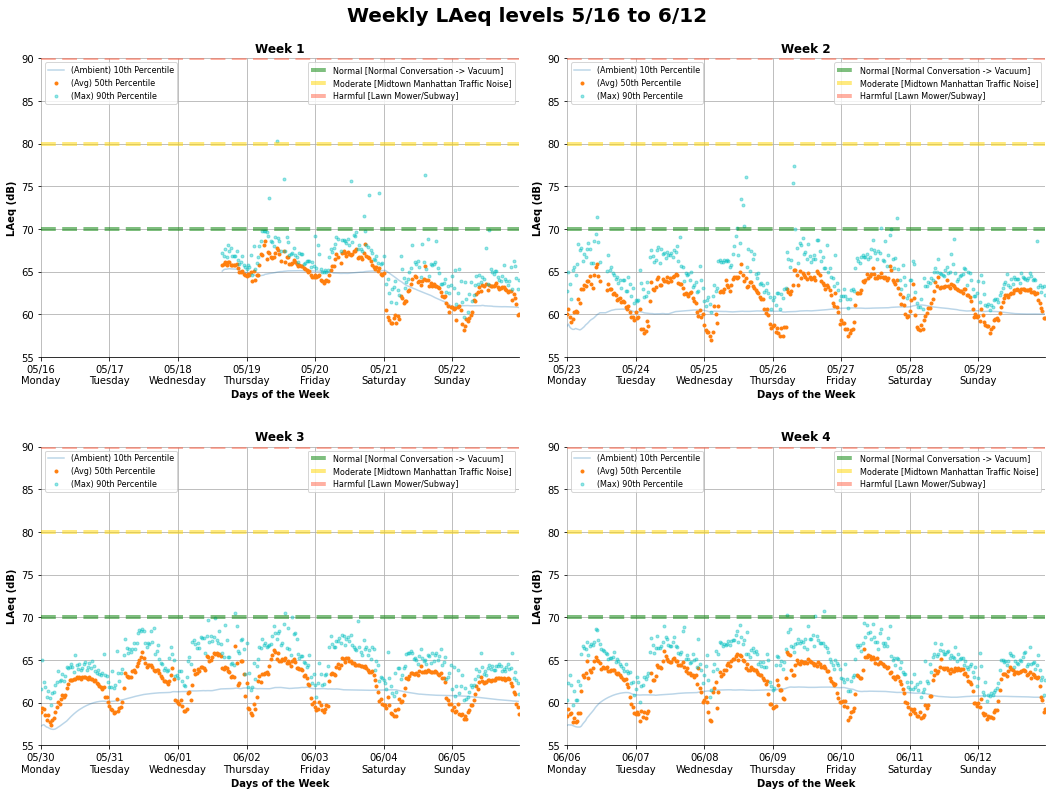

In [28]:
"""
Plotting weekly time-series of deployment duration
"""
fig1 = plt.figure(figsize=(18, 12))

fig1.subplots_adjust(top=0.92,hspace = .3, wspace=.1)
fig1.suptitle(f'Weekly LAeq levels {weekInfo[1].index[0].date().month}/{weekInfo[1].index[0].date().day} to {weekInfo[len(weekInfo)].index[-1].date().month}/{weekInfo[len(weekInfo)].index[-1].date().day}', 
             fontweight='bold',
            fontsize=20)
ncols = 2
nrows = len(weekInfo) // ncols + (len(weekInfo) % ncols > 0)
lw = 4
for n,week in enumerate(weekInfo):
    DWlabels = weekInfo[week].index
    DWlabels_DW = [daysofweekDict.get(i) for i in np.unique(weekInfo[week].index.dayofweek)]
    DWambient = weekInfo[week].ambientEQ
#     print(DWlabels)
    DW50 = weekInfo[week].fiftyEQ
    DW90 = weekInfo[week].maxsEQ

    ax = fig1.add_subplot(ncols,nrows, n+1)
    ax.set_title(f'Week {n+1}', fontweight='bold')
    rollingAmbient = DWambient.rolling('24H').mean()

    pltAmbient,= ax.plot(DWlabels, rollingAmbient, '-', alpha = 0.3, label = '(Ambient) 10th Percentile')
    pltMean, = ax.plot(DWlabels, DW50,'.', label = '(Avg) 50th Percentile')
    pltMax, = ax.plot(DWlabels, DW90,'.', alpha = 0.4, c='c',label = '(Max) 90th Percentile')
    
    
    ax.set_xlabel('Days of the Week', fontweight='bold')
    ax.set_ylabel('LAeq (dB)', fontweight='bold')
    ax.set_ylim([55,90])
    ax.set_xlim([DWlabels[0],DWlabels[-1]])

    ax.xaxis.set_major_locator(mdates.DayLocator(interval=1))   
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d\n%A')) 
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(False)
    
    ref6070 = ax.axhline(70,color='green',linestyle='--',alpha=0.5, linewidth=lw,label='Normal [Normal Conversation -> Vacuum]')
    ref7080 = ax.axhline(80,color='gold',linestyle='--',alpha=0.5, linewidth=lw,label='Moderate [Midtown Manhattan Traffic Noise]')
    ref8090 = ax.axhline(90,color='tomato',linestyle='--',alpha=0.5,linewidth=lw, label='Harmful [Lawn Mower/Subway]')

    refLegend = ax.legend(handles=[ref6070, ref7080, ref8090],facecolor = 'white',loc='upper right', fontsize=8)
    plt.gca().add_artist(refLegend)
    plt.legend(handles=[pltAmbient,pltMean, pltMax],facecolor = 'white',loc='upper left', fontsize=8)
    
    ax.grid(True)


## -------------------------

### Heatmaps

In [29]:
import seaborn as sns

In [30]:
"""
Aggregating data by Freq=1H
"""
HMxHR_all = getBasicStat(pd.Grouper(key='datetime', freq='1H'))
HMxHR = HMxHR_all[-1]
HMxHR['dayofweek'] = HMxHR.index.dayofweek
HMxHR['hour'] = HMxHR.index.hour
print(HMxHR)

                          laeq                                 ambientEQ  \
                          mean    min    max       std  median             
datetime                                                                   
2022-05-18 15:00:00  66.081280  60.14  87.18  1.832391  65.735    65.060   
2022-05-18 16:00:00  66.265889  64.67  79.45  1.193192  65.990    65.400   
2022-05-18 17:00:00  66.299942  64.60  85.48  1.580995  65.920    65.370   
2022-05-18 18:00:00  66.343444  64.19  83.52  1.602143  65.970    65.270   
2022-05-18 19:00:00  66.017406  64.22  86.57  1.162476  65.790    65.220   
...                        ...    ...    ...       ...     ...       ...   
2022-06-13 15:00:00  64.679119  62.78  80.00  1.565240  64.250    63.500   
2022-06-13 16:00:00  64.568303  62.55  82.80  1.516403  64.135    63.450   
2022-06-13 17:00:00  64.529194  62.57  85.57  1.947486  63.990    63.270   
2022-06-13 18:00:00  63.944308  62.20  84.56  1.456503  63.590    62.870   
2022-06-13 1

#### Weekly Heat Map: Absolute Average Hourly LAeq Levels per Day of Week

In [99]:
"""
|| FUNCTION: to plot weekly heatmaps 
"""
def plotHeatMap(datadict, column, index, values, labelDoW=False):
    fig1 = plt.figure(figsize=(20, 10))


    fig1.subplots_adjust(top=0.9,hspace = .3, wspace=.15)

    fig1.suptitle('Weekly Heat Map of LAeq 50th Percentile Levels', weight='normal', fontsize=20)

    ncols = 2
    nrows = len(datadict) // ncols + (len(datadict) % ncols > 0)

    for n,wk in enumerate(datadict):
        wkData = datadict[wk]
        dateLabels = np.unique(wkData.index.date)
        
        df3 = wkData.reset_index().pivot(columns=column,index = index,values=values)
        df3.index = df3.index.astype(int)
        
        ax = fig1.add_subplot(ncols,nrows, n+1)
        ax.set_title(f'Week {n+1}: \n{dateLabels[0]} to {dateLabels[-1]}', fontweight='bold')
        
        ax = sns.heatmap(df3.T, vmin = 55, vmax = 70, linewidths=.5,cmap='YlOrRd', cbar_kws={'label': 'dB'});
        ax.set_yticklabels([daysofweekDict.get(i) for i in df3.columns])

        if labelDoW == True:
            ax.set_xticks(np.arange(len(timeofdayDict.values()))+0.5)
            ax.set_xticklabels(timeofdayDict.values(), rotation=0)
        plt.setp(ax.get_yticklabels(), rotation=0, horizontalalignment='right')

        plt.xlabel('Hour', weight='bold')
        plt.ylabel('Day of Week', weight='bold')


In [33]:
"""
grouping dataframe into separate weeks and backfilling the first week
"""
HMxHRxWK = groupWeek(HMxHR)
wk1 = fillWeek(HMxHR, '1H')

HMxHRxWK[1] = HMxHRxWK[1].append(pd.DataFrame(index=wk1))
HMxHRxWK[1] = HMxHRxWK[1].sort_index()
HMxHRxWK[1]['dayofweek'] = HMxHRxWK[1].index.dayofweek
HMxHRxWK[1]['hour'] = HMxHRxWK[1].index.hour

print(HMxHRxWK[1])

                          laeq                                 ambientEQ  \
                          mean    min    max       std  median             
2022-05-16 00:00:00        NaN    NaN    NaN       NaN     NaN       NaN   
2022-05-16 01:00:00        NaN    NaN    NaN       NaN     NaN       NaN   
2022-05-16 02:00:00        NaN    NaN    NaN       NaN     NaN       NaN   
2022-05-16 03:00:00        NaN    NaN    NaN       NaN     NaN       NaN   
2022-05-16 04:00:00        NaN    NaN    NaN       NaN     NaN       NaN   
...                        ...    ...    ...       ...     ...       ...   
2022-05-22 19:00:00  62.920560  61.42  76.55  1.194016  62.710    62.150   
2022-05-22 20:00:00  63.274075  61.26  79.28  1.969296  62.740    61.860   
2022-05-22 21:00:00  62.615965  59.66  77.86  2.174974  61.975    60.805   
2022-05-22 22:00:00  62.172133  58.08  81.16  2.651241  61.490    59.700   
2022-05-22 23:00:00  60.499794  57.21  76.72  2.457639  60.000    58.198   

           

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Lato


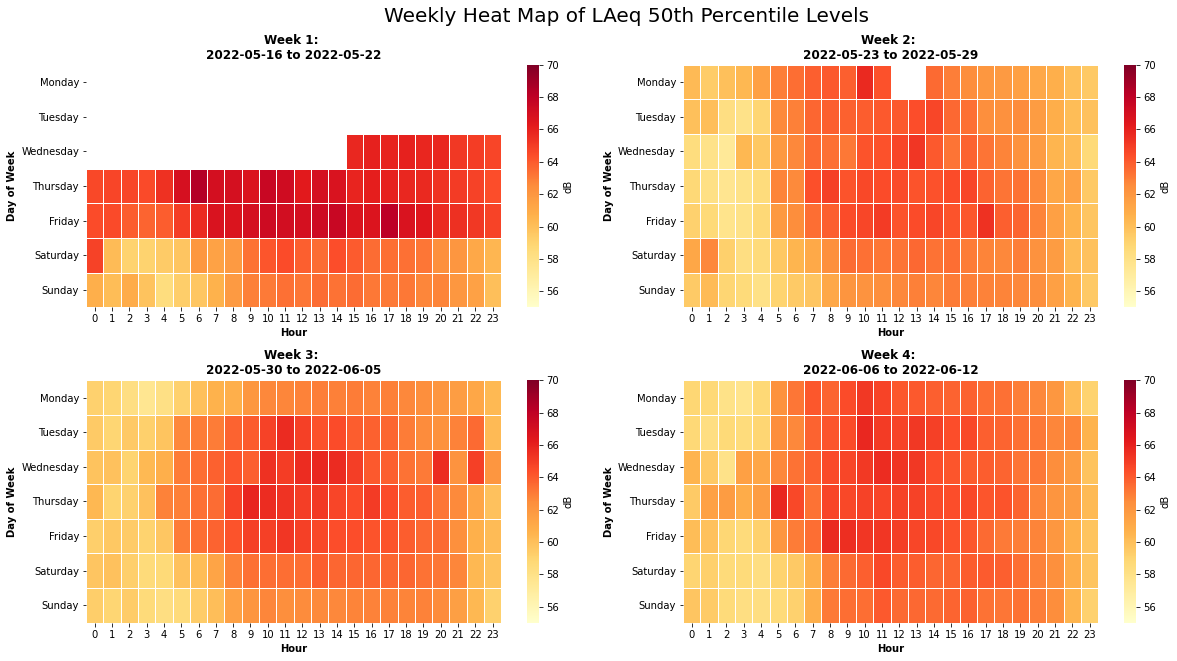

In [34]:
plotHeatMap(HMxHRxWK, 'dayofweek', 'hour', 'fiftyEQ')

#### Aggregate Heatmap of Data sorted by Hour

/Users/anniechu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


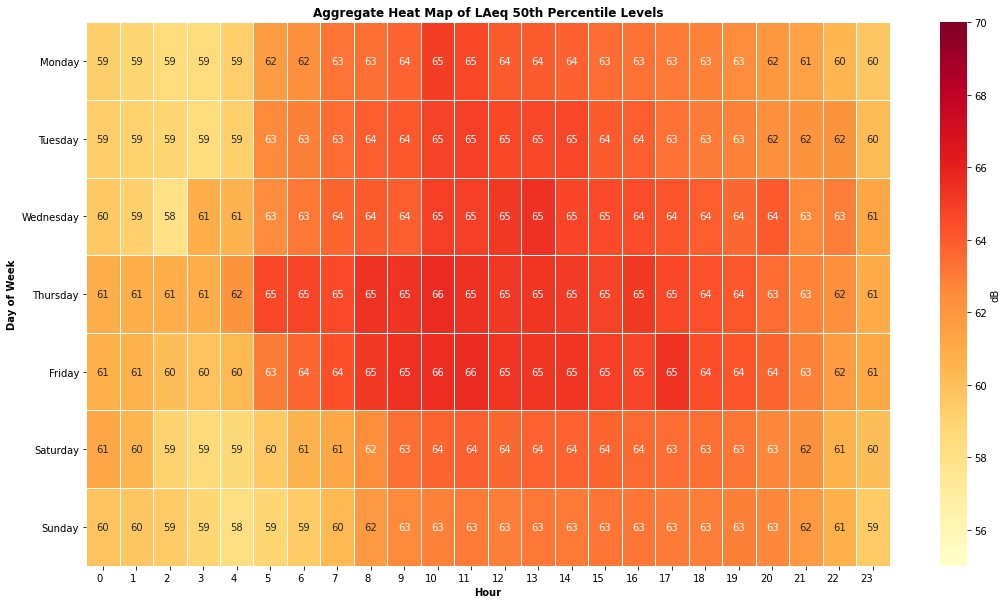

In [35]:
"""
Plotting heatmap of entire deployment duration
"""
wkData = HMxHR.copy()
# print(wkData)
dateLabels = np.unique(wkData.index.date)

df3 = wkData.reset_index().pivot_table(columns='dayofweek',index = 'hour',values='fiftyEQ')
df3.columns = df3.columns.droplevel(0)
# print(df3.columns)

# print(df3)
fig, ax = plt.subplots(figsize=(18, 10))
hm = sns.heatmap(df3.T, annot = True,vmin = 55, vmax = 70, linewidths=.75,cmap='YlOrRd', cbar_kws={'label': 'dB'});

hm.set_yticklabels([daysofweekDict.get(i) for i in df3.columns])
# hm.set_yticks(np.arange(len(timeofdayDict.values()))+0.5)
plt.setp(hm.get_yticklabels(), rotation=0, horizontalalignment='right')
plt.setp(hm.get_xticklabels(), rotation=0, horizontalalignment='right')

plt.ylabel('Day of Week', fontweight='bold')
plt.xlabel('Hour', fontweight='bold')
plt.title(f'Aggregate Heat Map of LAeq 50th Percentile Levels', fontweight='bold');

In [275]:
def leq(dbs):
    return 10 * np.log10(np.asarray(dbs) / 10.)

In [279]:
leq([50,10,60])

array([6.98970004, 0.        , 7.7815125 ])

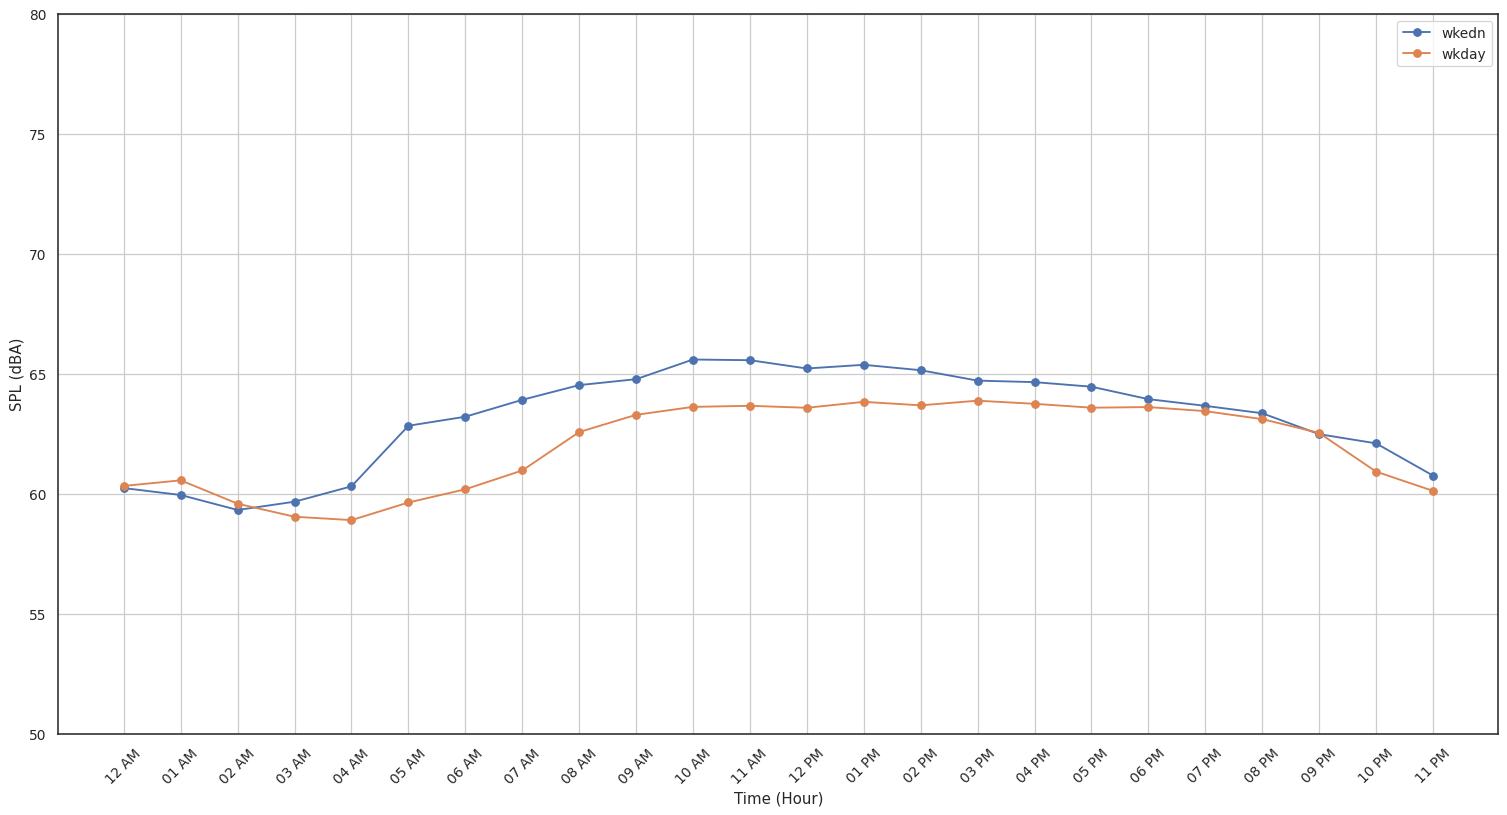

In [360]:
wkdataSPLIT = df.copy()
wkdataSPLIT['isWeekend']= np.where(wkdataSPLIT.dayofweek >=5, True, False)
# wkdataSPLIT.head(-3)
wkDAYS = wkdataSPLIT[wkdataSPLIT['isWeekend'] == True]
wkENDS = wkdataSPLIT[wkdataSPLIT['isWeekend'] == False]
wkDAYS.head(3)

eq_wkDAYS = wkDAYS.groupby(['hour']).agg({'laeq':['mean']}) #need to replace with leq
eq_wkDAYS.columns= eq_wkDAYS.columns.droplevel(0)

eq_wkENDS = wkENDS.groupby(['hour']).agg({'laeq':['mean']}) #need to replace with leg
eq_wkENDS.columns= eq_wkENDS.columns.droplevel(0)

eq_wkDAYS.head()


eqWK = eq_wkDAYS.copy()
eqWK = eqWK.rename(columns={"mean": "wkday"})
eqWK['wkend'] = eq_wkENDS
eqWK


hr_labels = [hrs12[str(hr24)] for hr24 in eqWK.index]

fig2 = figure(figsize=(16, 8), dpi=90)
ax2 = fig2.add_axes([1, 1, 1, 1])
ax2.plot(hr_labels,eqWK.wkend, 'o-', label='wkedn')
ax2.plot(hr_labels, eqWK.wkday,'o-', label='wkday')
plt.ylim([50, 80])
plt.xticks(rotation=45)
ax2.set_xlabel('Time (Hour)')
ax2.set_ylabel('SPL (dBA)')
ax2.legend(facecolor='white')
ax2.grid(True)

In [273]:
# df.head(4)

,Unnamed: 0,laeq,lceq,lzeq,datetime,date,dayofweek,hour,time
0,0,64.35,72.85,73.29,2022-05-18 23:59:16.155,2022-05-18,2,23,23:59:16.155000
1,1,64.44,73.43,73.85,2022-05-18 23:59:16.898,2022-05-18,2,23,23:59:16.898000
2,2,64.08,72.59,73.08,2022-05-18 23:59:18.392,2022-05-18,2,23,23:59:18.392000
3,3,64.06,71.71,72.36,2022-05-18 23:59:19.126,2022-05-18,2,23,23:59:19.126000


#### Weekly Heat Map: Average Comparison

In [36]:
absoluteHM_all = HMxHR.copy()

absoluteHM = absoluteHM_all.reset_index().pivot_table(columns='dayofweek',index = 'hour',values='fiftyEQ')
absoluteHM.columns = absoluteHM.columns.droplevel(0)

# print(absoluteHM)


/Users/anniechu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [37]:
"""
|| FUNCTION: plot how weekly values compare to average SPL levels
"""
def plotHeatMapdiff(datadict, averageDF, column, index, values, labelDoW=False):
    fig1 = plt.figure(figsize=(20, 10))


    fig1.subplots_adjust(top=0.92,hspace = .3, wspace=.15)

    fig1.suptitle('How typical was this week\'s noise levels?', weight='normal', fontsize=20)

    ncols = 2
    nrows = len(datadict) // ncols + (len(datadict) % ncols > 0)

    for n,wk in enumerate(datadict):
        wkData = datadict[wk]
        dateLabels = np.unique(wkData.index.date)
        
        df3 = wkData.reset_index().pivot(columns=column,index = index,values=values)
        df3.index = df3.index.astype(int)

        df4 = df3-averageDF
        ax = fig1.add_subplot(ncols,nrows, n+1)
        ax.set_title(f'Week {n+1}: \n{dateLabels[0]} to {dateLabels[-1]}', fontweight='bold')
        
        ax = sns.heatmap(df4.T, vmin=-4, vmax=4,linewidths=.5,cmap='vlag', cbar_kws={'label': '+/- Average dB'});
        ax.set_yticklabels([daysofweekDict.get(i) for i in df4.columns])

        if labelDoW == True:
            ax.set_xticks(np.arange(len(timeofdayDict.values()))+0.5)
            ax.set_xticklabels(timeofdayDict.values(), rotation=0)
        plt.setp(ax.get_yticklabels(), rotation=0, horizontalalignment='right')
        plt.xlabel('Hour', weight='bold')
        plt.ylabel('Day of Week', weight='bold')

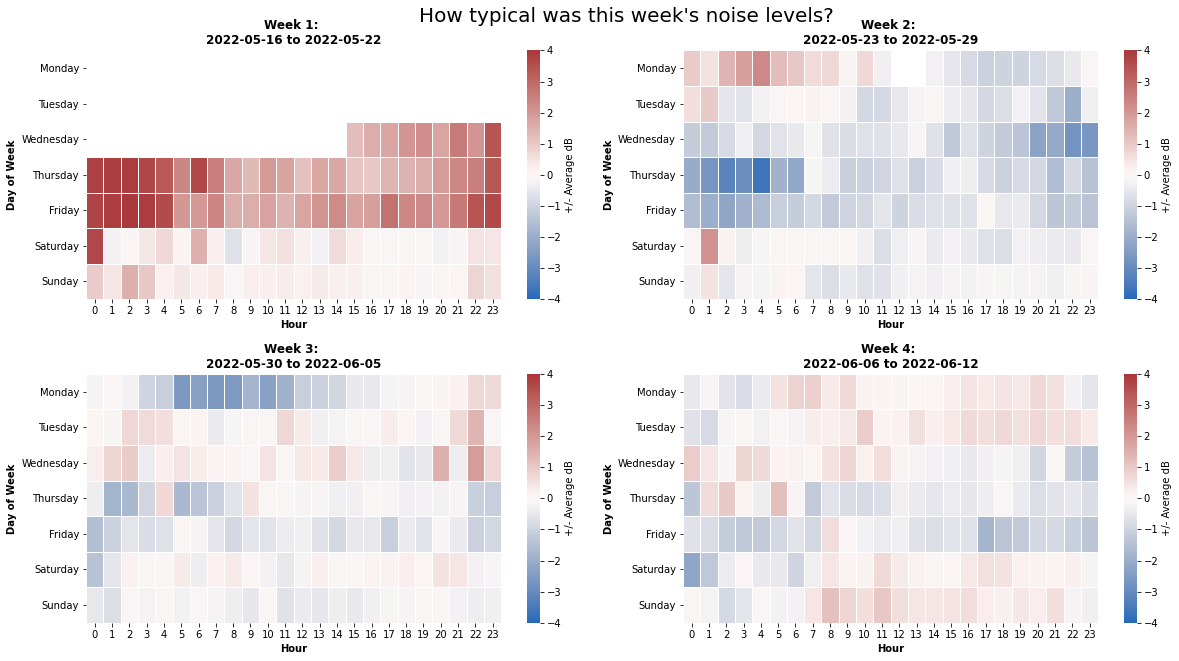

In [38]:
plotHeatMapdiff(HMxHRxWK, absoluteHM,'dayofweek', 'hour', 'fiftyEQ')

#### Heat Map: LAeq Levels by Time of Day per Day of Week

In [43]:
"""
Aggregating data by Freq=6H
"""
HMxTD_all = getBasicStat(pd.Grouper(key='datetime', freq='6H'))
HMxTD = HMxTD_all[-1]
HMxTD['dayofweek'] = HMxTD.index.dayofweek
HMxTD['hour'] = HMxTD.index.hour
print(HMxTD)


timeofdayDict = {0: 'Early Morning\n(12am-6am)', 
                 6: 'Morning\n(6am-12pm)', 
                 12: 'Afternoon\n(12pm-6pm)', 
                 18: 'Night\n(6pm-12am)'}

                          laeq                                 ambientEQ  \
                          mean    min    max       std  median             
datetime                                                                   
2022-05-18 12:00:00  66.245063  60.14  87.18  1.493172  65.920    65.310   
2022-05-18 18:00:00  65.675443  63.28  88.32  1.466865  65.480    64.440   
2022-05-19 00:00:00  65.065275  62.79  87.52  1.739101  64.680    63.870   
2022-05-19 06:00:00  67.848275  64.77  85.75  2.747938  67.210    65.870   
2022-05-19 12:00:00  66.829829  64.55  86.13  2.035831  66.265    65.550   
...                        ...    ...    ...       ...     ...       ...   
2022-06-12 18:00:00  62.304280  56.57  86.66  2.402014  62.650    59.069   
2022-06-13 00:00:00  59.696810  55.93  82.86  2.768274  58.920    57.050   
2022-06-13 06:00:00  65.914120  58.52  99.95  3.986276  64.970    62.090   
2022-06-13 12:00:00  65.310339  62.55  85.57  2.458062  64.510    63.540   
2022-06-13 1

In [44]:
HMxTD['timeofday'] = [timeofdayDict.get(i) for i in HMxTD.index.hour]
# print(HMxTD)

In [45]:
HMxTDxWK = groupWeek(HMxTD)
# print(HMxTDxWK)

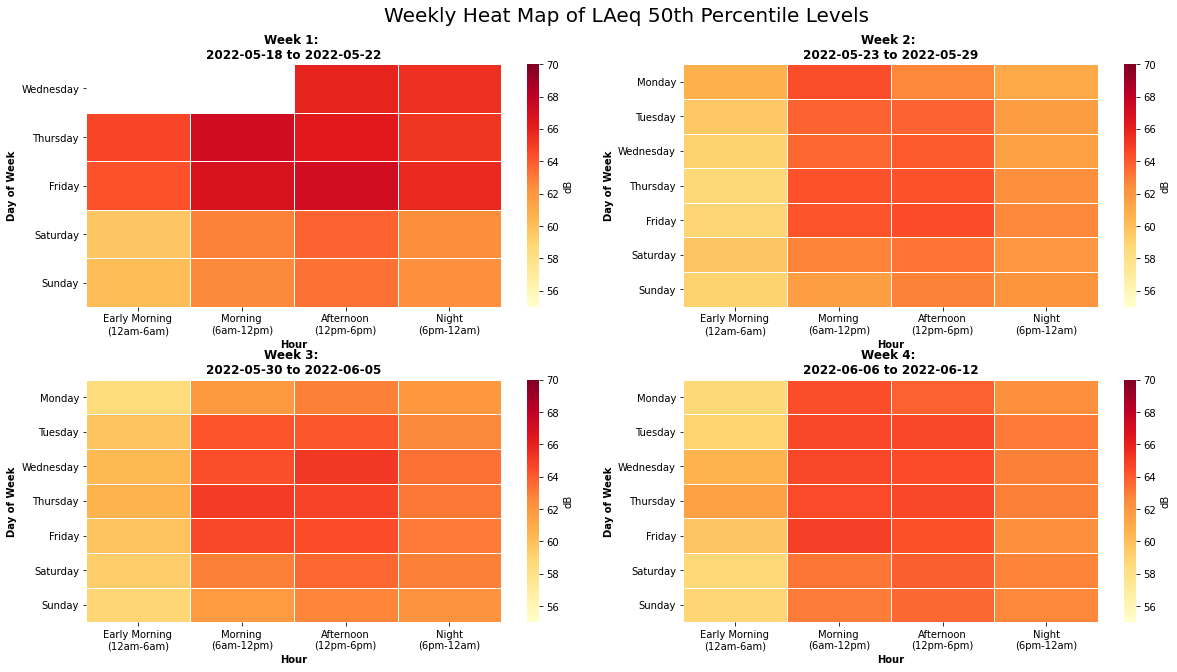

In [46]:
plotHeatMap(HMxTDxWK, 'dayofweek','hour', 'fiftyEQ',labelDoW = True)


==========================================================

#### Heatmap of Aggregate Data sorted by Time of Day

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64', name='dayofweek')
dayofweek        0          1          2        3         4        5        6
hour                                                                         
0          59.2200  59.436667  59.996667  61.3825  60.66500  59.3375  59.2025
6          63.9125  64.173333  64.226667  65.2650  65.15000  62.9225  62.2675
12         63.4700  64.176667  64.887500  64.9775  65.09750  63.6275  63.0950
18         62.2500  62.440000  63.307500  63.4325  63.45125  62.5475  62.3450


/Users/anniechu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


Text(0.5, 1.05, 'Aggregate Heat Map of LAeq 50th Percentile Levels')

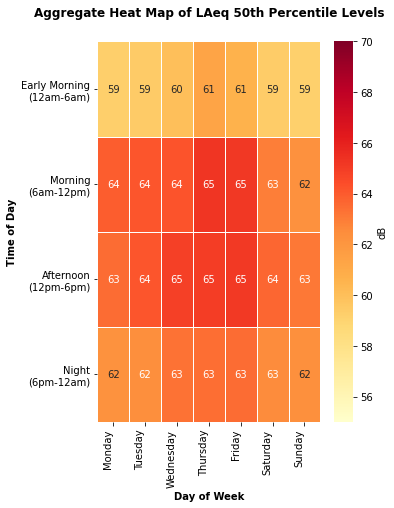

In [47]:
# print(HMxTD)
dfAG = HMxTD.copy()
dfAG = dfAG.reset_index().pivot_table(columns = 'dayofweek',index = 'hour', values='fiftyEQ')
dfAG.columns = dfAG.columns.droplevel(0)
print(dfAG.columns)

print(dfAG)
fig, ax = plt.subplots(figsize=(5, 7))
hm = sns.heatmap(dfAG, annot = True,vmin = 55, vmax = 70, linewidths=.75,cmap='YlOrRd', cbar_kws={'label': 'dB'});

hm.set_xticklabels([daysofweekDict.get(i) for i in dfAG.columns])
hm.set_yticks(np.arange(len(timeofdayDict.values()))+0.5)
hm.set_yticklabels(timeofdayDict.values(), rotation=0)
plt.setp(hm.get_xticklabels(), rotation=90, horizontalalignment='right')

plt.xlabel('Day of Week', fontweight='bold')
plt.ylabel('Time of Day', fontweight='bold')
plt.title(f'Aggregate Heat Map of LAeq 50th Percentile Levels', fontweight='bold', y =1.05)

###### Heatmap split by day/night

In [62]:
HMxHRsplit = HMxHR.copy()

HMxHRsplit['isDay']= np.where((HMxHRsplit.index.time > datetime.time(6,0)) & (HMxHRsplit.index.time < datetime.time(18,0)), True, False)

print(HMxHRsplit.head(-10))                         

dayHMxHRsplit = HMxHRsplit[HMxHRsplit['isDay'] == True]
nightHMxHRsplit = HMxHRsplit[HMxHRsplit['isDay'] == False]


                          laeq                                 ambientEQ  \
                          mean    min    max       std  median             
datetime                                                                   
2022-05-18 15:00:00  66.081280  60.14  87.18  1.832391  65.735    65.060   
2022-05-18 16:00:00  66.265889  64.67  79.45  1.193192  65.990    65.400   
2022-05-18 17:00:00  66.299942  64.60  85.48  1.580995  65.920    65.370   
2022-05-18 18:00:00  66.343444  64.19  83.52  1.602143  65.970    65.270   
2022-05-18 19:00:00  66.017406  64.22  86.57  1.162476  65.790    65.220   
...                        ...    ...    ...       ...     ...       ...   
2022-06-13 05:00:00  62.701333  56.95  79.65  2.848321  62.490    59.169   
2022-06-13 06:00:00  63.190581  58.52  82.93  2.601036  62.885    60.299   
2022-06-13 07:00:00  64.316936  60.16  78.53  2.300256  64.320    61.490   
2022-06-13 08:00:00  65.218142  61.69  89.61  2.378928  64.830    62.929   
2022-06-13 0

In [63]:
WKdayHMxHRsplit = groupWeek(dayHMxHRsplit)
WKnightHMxHRsplit = groupWeek(nightHMxHRsplit)
print(WKnightHMxHRsplit)

{1:                           laeq                                 ambientEQ  \
                          mean    min    max       std  median             
2022-05-18 18:00:00  66.343444  64.19  83.52  1.602143  65.970    65.270   
2022-05-18 19:00:00  66.017406  64.22  86.57  1.162476  65.790    65.220   
2022-05-18 20:00:00  66.209283  64.50  84.83  1.772489  65.800    65.230   
2022-05-18 21:00:00  65.336486  63.47  78.51  1.027304  65.170    64.440   
2022-05-18 22:00:00  65.289739  63.35  87.95  1.387591  64.980    64.240   
2022-05-18 23:00:00  64.856526  63.28  88.32  1.043858  64.690    64.020   
2022-05-19 00:00:00  64.863065  63.00  87.52  1.830333  64.580    63.900   
2022-05-19 01:00:00  64.888431  62.91  74.02  1.103292  64.700    63.850   
2022-05-19 02:00:00  65.245652  63.01  72.60  1.703283  64.660    63.580   
2022-05-19 03:00:00  64.588676  62.79  68.03  0.944268  64.510    63.420   
2022-05-19 04:00:00  65.692255  63.29  69.72  1.396036  65.400    63.998   
2022-05-

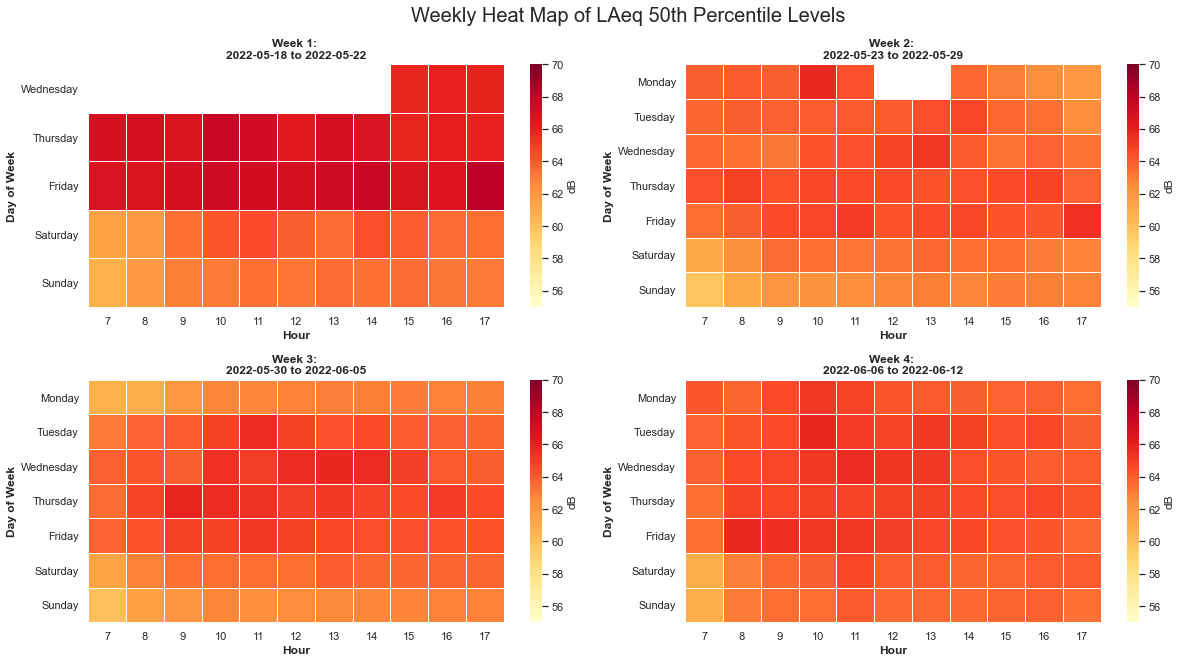

In [65]:
plotHeatMap(WKdayHMxHRsplit, 'dayofweek', 'hour', 'fiftyEQ')
# plotHeatMap(WKnightHMxHRsplit, 'dayofweek', 'hour', 'fiftyEQ')


In [89]:
def plotHeatMapNIGHT(datadict, column, index, values, labelDoW=False):
    fig1 = plt.figure(figsize=(20, 10))


    fig1.subplots_adjust(top=0.9,hspace = .3, wspace=.15)

    fig1.suptitle('NIGHT: Weekly Heat Map of LAeq 50th Percentile Levels', weight='normal', fontsize=20)

    ncols = 2
    nrows = len(datadict) // ncols + (len(datadict) % ncols > 0)

    for n,wk in enumerate(datadict):
        wkData = datadict[wk]
        dateLabels = np.unique(wkData.index.date)
#         print(wkData.head(5).laeq['mean'])
        df3 = wkData.reset_index().pivot(columns=column,index = index,values=values)
        df3.index = df3.index.astype(int)
#         print(df3)
        field = "hour"
        hr_order = [18, 19, 20, 21, 22, 23, 0, 1 ,2, 3, 4, 5, 6]
        df3new = df3.reindex(hr_order)
        ax = fig1.add_subplot(ncols,nrows, n+1)
        ax.set_title(f'Week {n+1}: \n{dateLabels[0]} to {dateLabels[-1]}', fontweight='bold')
        
        ax = sns.heatmap(df3new.T, vmin = 55, vmax = 70, linewidths=.5,cmap='YlOrRd', cbar_kws={'label': 'dB'});
        ax.set_yticklabels([daysofweekDict.get(i) for i in df3.columns])

        if labelDoW == True:
            ax.set_xticks(np.arange(len(timeofdayDict.values()))+0.5)
            ax.set_xticklabels(timeofdayDict.values(), rotation=0)
        plt.setp(ax.get_yticklabels(), rotation=0, horizontalalignment='right')

        plt.xlabel('Hour', weight='bold')
        plt.ylabel('Day of Week', weight='bold')

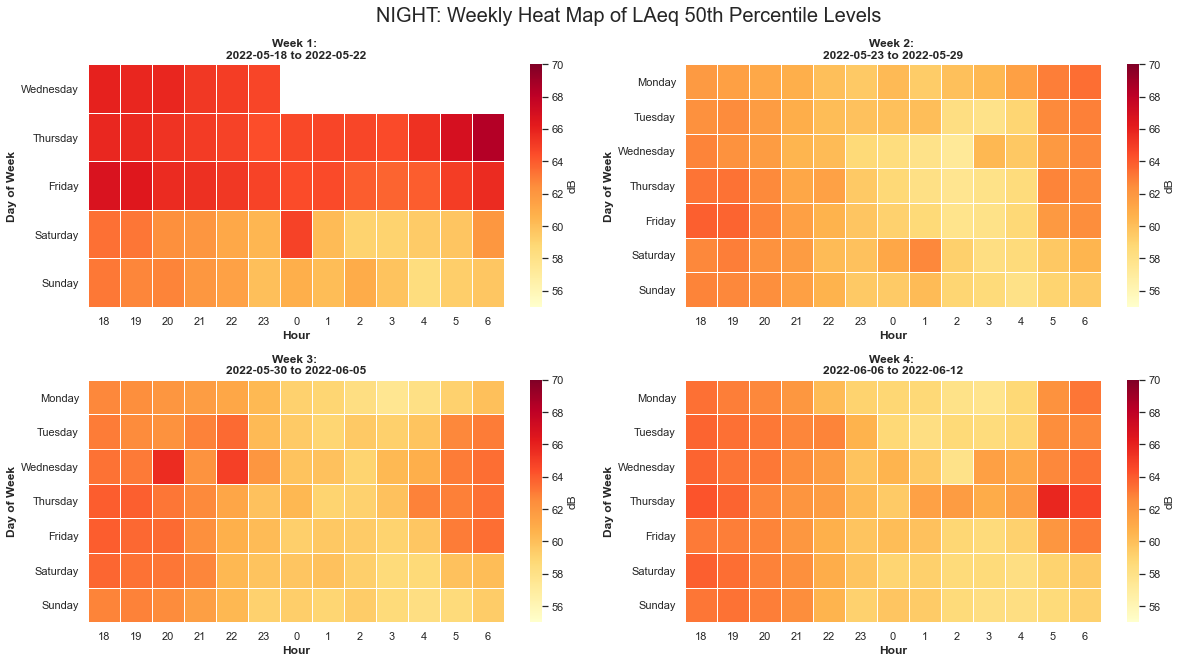

In [90]:
plotHeatMapNIGHT(WKnightHMxHRsplit, 'dayofweek', 'hour', 'fiftyEQ')


#### Ridgeline Plots

In [48]:
# ridgeDY = wkData.copy()
# print(ridgeDY)

RGExMIN_all = getBasicStat(pd.Grouper(key='datetime', freq='1H'))
RGExMIN = RGExMIN_all[-1]
RGExMIN['dayofweek'] = RGExMIN.index.dayofweek
RGExMIN['hour'] = RGExMIN.index.hour
# print(RGExMIN)

In [49]:
daymean = RGExMIN.groupby('dayofweek')['fiftyEQ'].mean()
RGExMIN['mean_Day'] = RGExMIN['dayofweek'].map(daymean)


In [50]:
hrmean = RGExMIN.groupby('hour')['fiftyEQ'].mean()
RGExMIN['mean_Hour'] = RGExMIN['hour'].map(hrmean)

In [51]:
print(RGExMIN)

                          laeq                                 ambientEQ  \
                          mean    min    max       std  median             
datetime                                                                   
2022-05-18 15:00:00  66.081280  60.14  87.18  1.832391  65.735    65.060   
2022-05-18 16:00:00  66.265889  64.67  79.45  1.193192  65.990    65.400   
2022-05-18 17:00:00  66.299942  64.60  85.48  1.580995  65.920    65.370   
2022-05-18 18:00:00  66.343444  64.19  83.52  1.602143  65.970    65.270   
2022-05-18 19:00:00  66.017406  64.22  86.57  1.162476  65.790    65.220   
...                        ...    ...    ...       ...     ...       ...   
2022-06-13 15:00:00  64.679119  62.78  80.00  1.565240  64.250    63.500   
2022-06-13 16:00:00  64.568303  62.55  82.80  1.516403  64.135    63.450   
2022-06-13 17:00:00  64.529194  62.57  85.57  1.947486  63.990    63.270   
2022-06-13 18:00:00  63.944308  62.20  84.56  1.456503  63.590    62.870   
2022-06-13 1

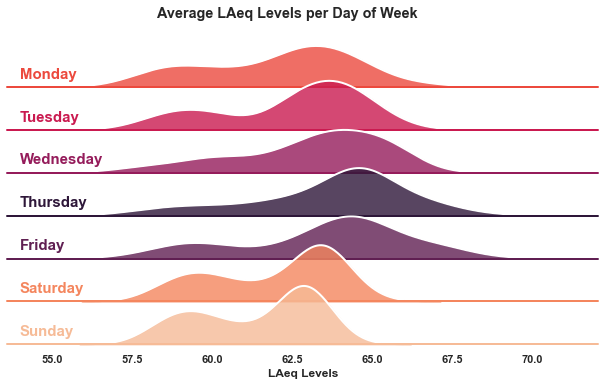

In [52]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

pal = sns.color_palette(palette='rocket_r', n_colors=7)
g = sns.FacetGrid(RGExMIN, row='dayofweek', hue='mean_Day', aspect=12, height=0.75, palette=pal);

#PLOTTING VALUES
g.map(sns.kdeplot, 'fiftyEQ',
      bw_adjust=1, clip_on=False,
      fill=True, alpha=0.8, linewidth=1)
g.map(sns.kdeplot, 'fiftyEQ', 
      bw_adjust=1, clip_on=False, 
      color="w", lw=2)

#adding bottom line
g.map(plt.axhline, y=0,
      lw=2, clip_on=False)

#adding days of week to plot
for i, ax in enumerate(g.axes.flat):
    ax.text(54, 0.04, daysofweekDict[i],
            fontweight='bold', fontsize=15,
            color=ax.lines[-1].get_color())

#changing height space between subplots
g.fig.subplots_adjust(hspace=-0.3)
    
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

# g.axes.refline(x=60)
# axes = g.axes.flatten()
# for i, ax in enumerate(axes):
#     ax.axvline(60, ymax=0.7,ls='--', c='orange')
#     ax.axvline(70, ymax=0.7,ls='-', c='red')


plt.setp(ax.get_xticklabels(), fontweight='bold')
plt.xlabel('LAeq Levels', fontweight='bold')
g.fig.suptitle('Average LAeq Levels per Day of Week',
               fontweight='bold',
               ha='center')
plt.show()

#### split into weekday/weekend

In [53]:
RGExMINsplit = RGExMIN.copy()
# print(RGExMINxWKSPLIT.dayofweek)
# RGExMINxWKSPLIT.dayofweek.loc[0:4]
print(RGExMIN.index)
RGExMINsplit['isDay']= np.where((RGExMINsplit.index.time > datetime.time(6,0)) & (RGExMINsplit.index.time < datetime.time(18,0)), True, False)

# RGExMINsplit['isDay']= np.where(RGExMINsplit.between_time('06:00', '18:00'), True, False)
print(RGExMINsplit.head(-50))                         
# wkdays=RGExMINxWKSPLIT.loc[(RGExMINxWKSPLIT['dayofweek'] >= 0) & (RGExMINxWKSPLIT['dayofweek'] <= 4)]
# wkends = RGExMINxWKSPLIT.loc[(RGExMINxWKSPLIT['dayofweek'] > 4) & (RGExMINxWKSPLIT['dayofweek'] <= 6)]
# print(wkends)

dayRGExMINsplit = RGExMINsplit[RGExMINsplit['isDay'] == True]
nightRGExMINsplit = RGExMINsplit[RGExMINsplit['isDay'] == False]



DatetimeIndex(['2022-05-18 15:00:00', '2022-05-18 16:00:00',
               '2022-05-18 17:00:00', '2022-05-18 18:00:00',
               '2022-05-18 19:00:00', '2022-05-18 20:00:00',
               '2022-05-18 21:00:00', '2022-05-18 22:00:00',
               '2022-05-18 23:00:00', '2022-05-19 00:00:00',
               ...
               '2022-06-13 10:00:00', '2022-06-13 11:00:00',
               '2022-06-13 12:00:00', '2022-06-13 13:00:00',
               '2022-06-13 14:00:00', '2022-06-13 15:00:00',
               '2022-06-13 16:00:00', '2022-06-13 17:00:00',
               '2022-06-13 18:00:00', '2022-06-13 19:00:00'],
              dtype='datetime64[ns]', name='datetime', length=629, freq='H')
                          laeq                                 ambientEQ  \
                          mean    min    max       std  median             
datetime                                                                   
2022-05-18 15:00:00  66.081280  60.14  87.18  1.832391  65.735   

In [54]:
len(RGExMINsplit[RGExMINsplit['isDay'] == False] )
# print(RGExMINsplit)

340

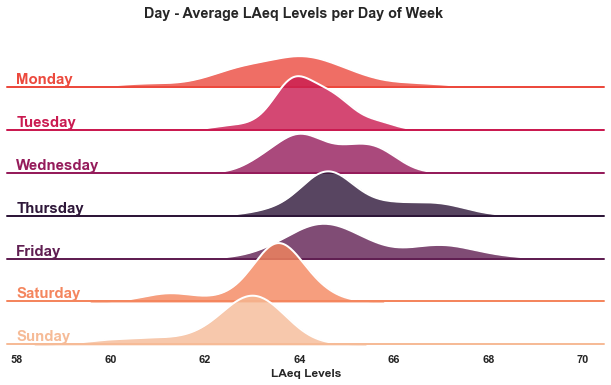

In [55]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

pal = sns.color_palette(palette='rocket_r', n_colors=7)
g = sns.FacetGrid(dayRGExMINsplit, row='dayofweek',hue='mean_Day', aspect=12, height=0.75, palette=pal);

# g = sns.FacetGrid(RGExMINsplit, row='hour', col = 'wkdayorend',hue='mean_Hour', aspect=16, height=0.5, palette=pal);

g.map(sns.kdeplot, 'fiftyEQ',
      bw_adjust=1, clip_on=False,
      fill=True, alpha=0.8, linewidth=1)
g.map(sns.kdeplot, 'fiftyEQ', 
      bw_adjust=1, clip_on=False, 
      color="w", lw=2)

#adding bottom line
g.map(plt.axhline, y=0,
      lw=2, clip_on=False)

#adding days of week to plot
for i, ax in enumerate(g.axes.flat):
    ax.text(58, 0.04, daysofweekDict[i],
            fontweight='bold', fontsize=15,
            color=ax.lines[-1].get_color())

#changing height space between subplots
g.fig.subplots_adjust(hspace=-0.3)
    
g.set_titles("")
g.set(yticks=[])
g.set(xticks=np.linspace(58,70,7))

g.despine(bottom=True, left=True)

# g.axes.refline(x=60)
# axes = g.axes.flatten()
# for i, ax in enumerate(axes):
#     ax.axvline(60, ymax=0.7,ls='--', c='orange')
#     ax.axvline(70, ymax=0.7,ls='-', c='red')


plt.setp(ax.get_xticklabels(), fontweight='bold')
plt.xlabel('LAeq Levels', fontweight='bold')
g.fig.suptitle('Day - Average LAeq Levels per Day of Week',
               fontweight='bold',
               ha='center')
plt.show()

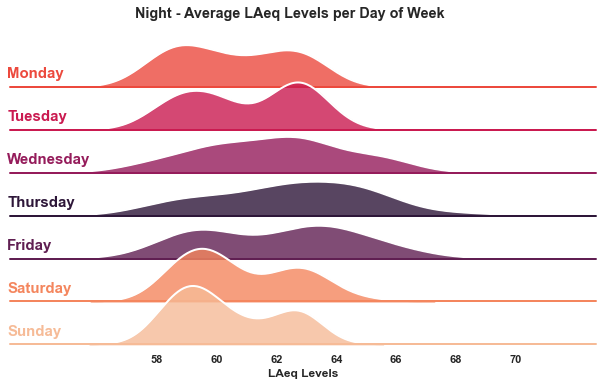

In [56]:
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

pal = sns.color_palette(palette='rocket_r', n_colors=7)
g = sns.FacetGrid(nightRGExMINsplit, row='dayofweek',hue='mean_Day', aspect=12, height=0.75, palette=pal);

# g = sns.FacetGrid(RGExMINsplit, row='hour', col = 'wkdayorend',hue='mean_Hour', aspect=16, height=0.5, palette=pal);

g.map(sns.kdeplot, 'fiftyEQ',
      bw_adjust=1, clip_on=False,
      fill=True, alpha=0.8, linewidth=1)
g.map(sns.kdeplot, 'fiftyEQ', 
      bw_adjust=1, clip_on=False, 
      color="w", lw=2)

#adding bottom line
g.map(plt.axhline, y=0,
      lw=2, clip_on=False)

#adding days of week to plot
for i, ax in enumerate(g.axes.flat):
    ax.text(53, 0.04, daysofweekDict[i],
            fontweight='bold', fontsize=15,
            color=ax.lines[-1].get_color())

#changing height space between subplots
g.fig.subplots_adjust(hspace=-0.3)
    
g.set_titles("")
g.set(yticks=[])
g.set(xticks=np.linspace(58,70,7))

g.despine(bottom=True, left=True)

# g.axes.refline(x=60)
# axes = g.axes.flatten()
# for i, ax in enumerate(axes):
#     ax.axvline(60, ymax=0.7,ls='--', c='orange')
#     ax.axvline(70, ymax=0.7,ls='-', c='red')


plt.setp(ax.get_xticklabels(), fontweight='bold')
plt.xlabel('LAeq Levels', fontweight='bold')
g.fig.suptitle('Night - Average LAeq Levels per Day of Week',
               fontweight='bold',
               ha='center')
plt.show()